In [21]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates


In [22]:
train = pd.read_csv(r"..\Data\01_raw\train.csv")
train.head()

,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0
1,1,2013-01-01,1,BABY CARE,0.0,0
2,2,2013-01-01,1,BEAUTY,0.0,0
3,3,2013-01-01,1,BEVERAGES,0.0,0
4,4,2013-01-01,1,BOOKS,0.0,0


In [23]:
train.shape

(3000888, 6)

In [24]:
output = []

for column in train.columns:

    null_values  = np.sum(pd.isna(train[column]))
    unique = train[column].nunique()
    column_data_type = train[column].dtype

    output.append([column, null_values, unique, column_data_type])

output_df = pd.DataFrame(output, columns = ['column','null values', 'unique', 'datatype'])

describe_df = train.describe().transpose() 
combine_df = pd.concat([ output_df.set_index('column'), describe_df], axis = 1, join='outer')

combine_df

,null values,unique,datatype,count,mean,std,min,25%,50%,75%,max
id,0,3000888,int64,3000888.0,1.500444e+06,866281.891642,0.0,750221.75,1500443.5,2.250665e+06,3000887.0
date,0,1684,object,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
store_nbr,0,54,int64,3000888.0,2.750000e+01,15.585787,1.0,14.00,27.5,4.100000e+01,54.0
family,0,33,object,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sales,0,379610,float64,3000888.0,3.577757e+02,1101.997721,0.0,0.00,11.0,1.958473e+02,124717.0
onpromotion,0,362,int64,3000888.0,2.602770e+00,12.218882,0.0,0.00,0.0,0.000000e+00,741.0


In [25]:
train.drop_duplicates(inplace=True)

In [26]:
train.shape

(3000888, 6)

In [63]:
family = train.groupby(['date','store_nbr'])['sales'].sum().to_frame()
family.sort_values('sales')

sales
date       store_nbr              
2013-01-01 47              0.00000
2013-07-18 53              0.00000
2015-02-11 29              0.00000
2013-06-03 29              0.00000
           42              0.00000
...                            ...
2016-04-17 44          90557.92509
2016-10-07 39         102862.54100
2016-04-18 45         114144.37800
2016-04-21 20         117725.09800
2016-05-02 2          136457.42700

[90936 rows x 1 columns]

([<matplotlib.axis.XTick at 0x2089da10b30>,
 [Text(2013, 0, '2013'),
  Text(2014, 0, '2014'),
  Text(2015, 0, '2015'),
  Text(2016, 0, '2016'),
  Text(2017, 0, '2017')])

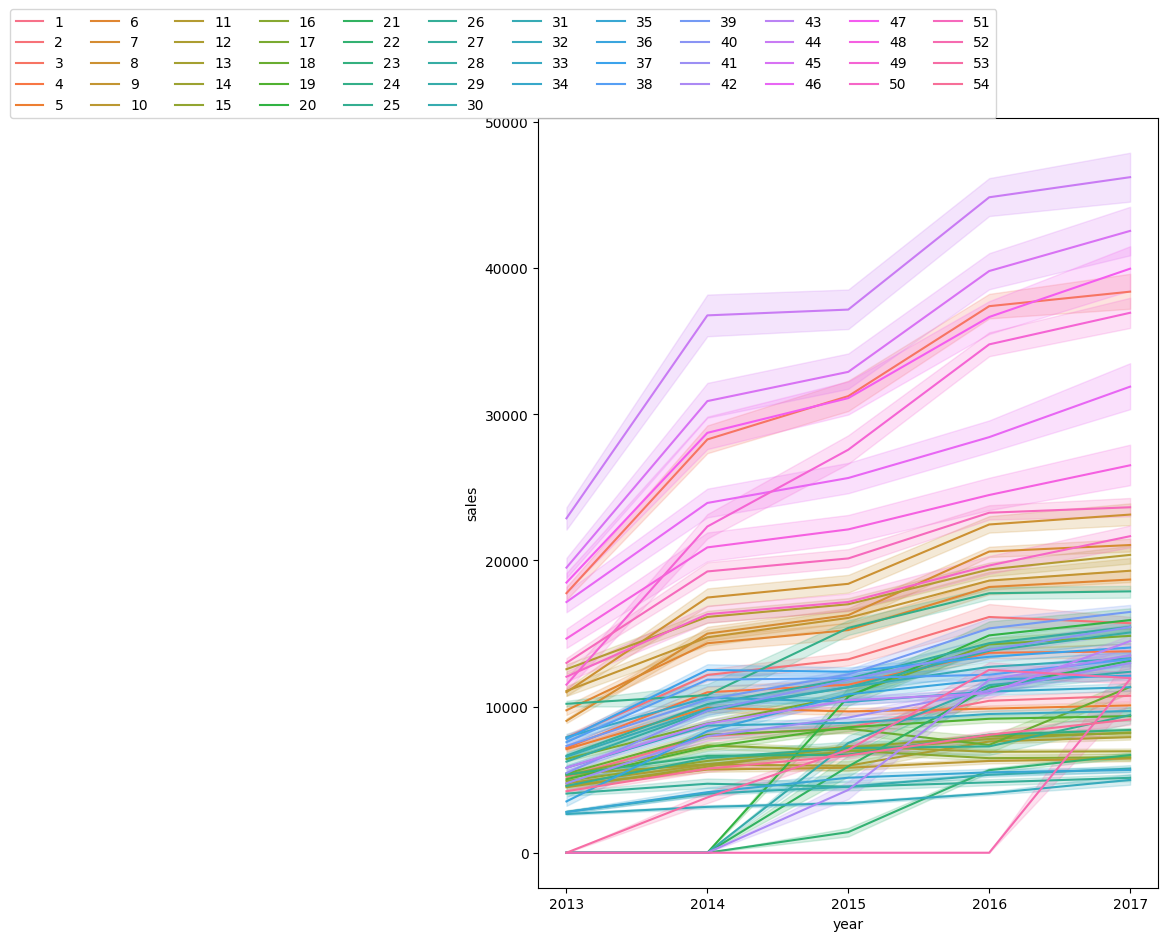

In [62]:
# family.reset_index(inplace=True)
# family['store_nbr'] = family['store_nbr'].astype(str)

plt.figure(figsize=(8, 10))
family['date'] = pd.to_datetime(family['date'])
family['year'] = family['date'].dt.year

sns.lineplot(data = family, x = 'year', y = 'sales', hue = 'store_nbr')
plt.legend(bbox_to_anchor=(0.75, 1.15), ncol=12)
plt.xticks(range(2013, 2018))


<Axes: xlabel='store_nbr', ylabel='sales'>

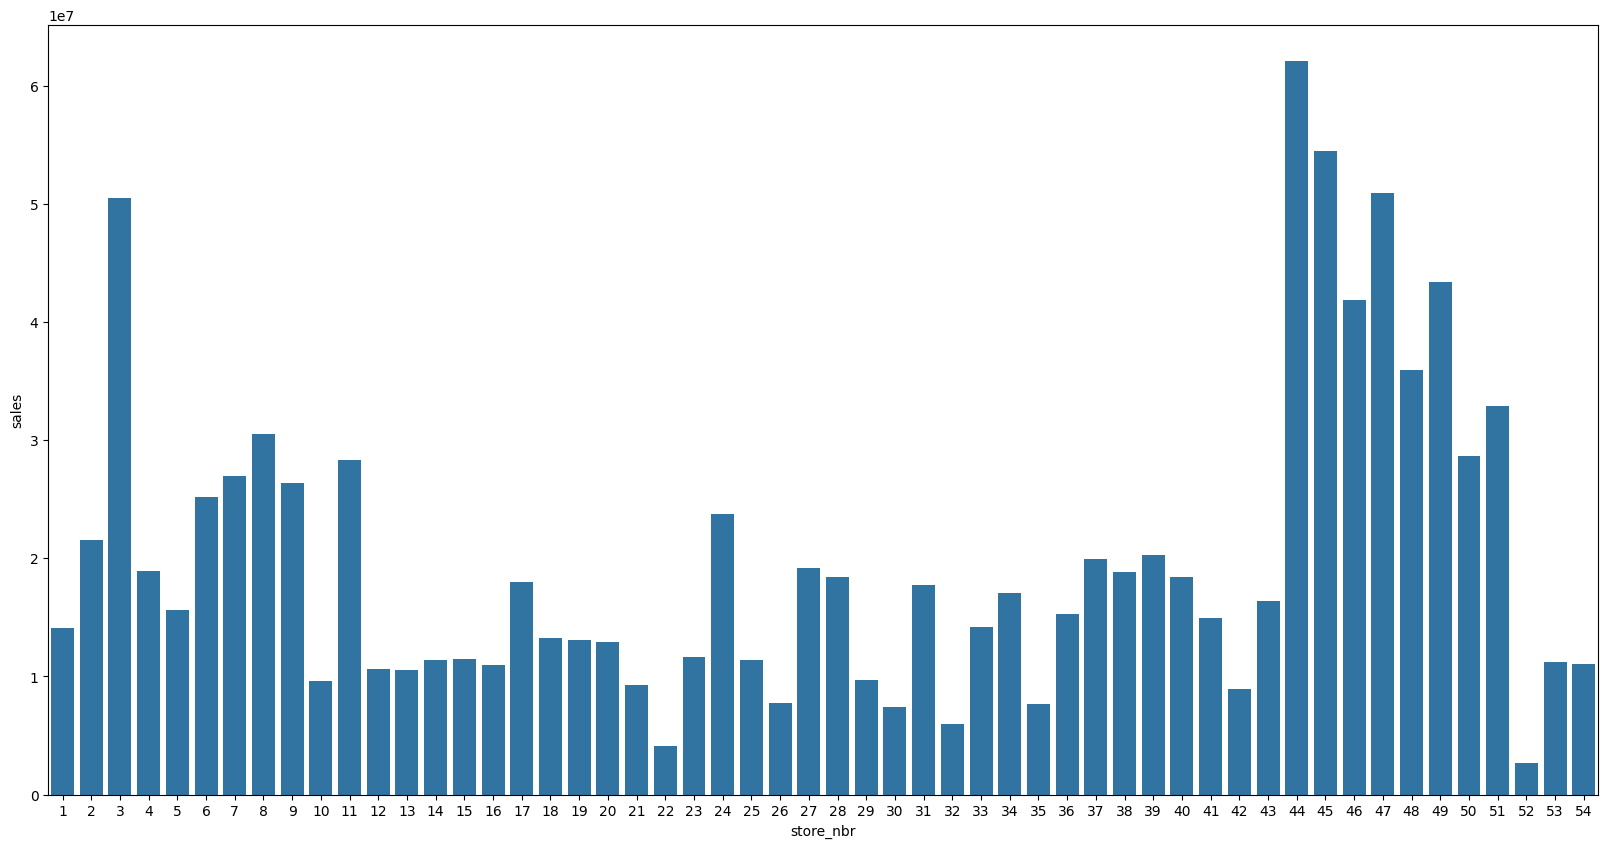

In [100]:
check = train.groupby(['store_nbr'])['sales'].sum().to_frame()
check.sort_values('sales')
check.reset_index()
plt.figure(figsize = (20, 10))
sns.barplot(data = check, x = 'store_nbr', y = 'sales')

In [64]:
x = pd.date_range(start = '2016-04-16',end='2016-05-08')
x

DatetimeIndex(['2016-04-16', '2016-04-17', '2016-04-18', '2016-04-19',
               '2016-04-20', '2016-04-21', '2016-04-22', '2016-04-23',
               '2016-04-24', '2016-04-25', '2016-04-26', '2016-04-27',
               '2016-04-28', '2016-04-29', '2016-04-30', '2016-05-01',
               '2016-05-02', '2016-05-03', '2016-05-04', '2016-05-05',
               '2016-05-06', '2016-05-07', '2016-05-08'],
              dtype='datetime64[ns]', freq='D')

In [67]:
family.reset_index()

,date,store_nbr,sales
0,2013-01-01,1,0.000000
1,2013-01-01,2,0.000000
2,2013-01-01,3,0.000000
3,2013-01-01,4,0.000000
4,2013-01-01,5,0.000000
...,...,...,...
90931,2017-08-15,50,16879.121004
90932,2017-08-15,51,20154.559000
90933,2017-08-15,52,18600.046000
90934,2017-08-15,53,8208.189000


([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32],
 [Text(0, 0, 'BOOKS'),
  Text(1, 0, 'BABY CARE'),
  Text(2, 0, 'HOME APPLIANCES'),
  Text(3, 0, 'HARDWARE'),
  Text(4, 0, 'BEAUTY'),
  Text(5, 0, 'LAWN AND GARDEN'),
  Text(6, 0, 'LINGERIE'),
  Text(7, 0, 'PET SUPPLIES'),
  Text(8, 0, 'AUTOMOTIVE'),
  Text(9, 0, 'MAGAZINES'),
  Text(10, 0, 'SCHOOL AND OFFICE SUPPLIES'),
  Text(11, 0, 'LADIESWEAR'),
  Text(12, 0, 'PLAYERS AND ELECTRONICS'),
  Text(13, 0, 'CELEBRATION'),
  Text(14, 0, 'GROCERY II'),
  Text(15, 0, 'SEAFOOD'),
  Text(16, 0, 'HOME AND KITCHEN I'),
  Text(17, 0, 'HOME AND KITCHEN II'),
  Text(18, 0, 'LIQUOR,WINE,BEER'),
  Text(19, 0, 'PREPARED FOODS'),
  Text(20, 0, 'FROZEN FOODS'),
  Text(21, 0, 'EGGS'),
  Text(22, 0, 'DELI'),
  Text(23, 0, 'HOME CARE'),
  Text(24, 0, 'MEATS'),
  Text(25, 0, 'POULTRY'),
  Text(26, 0, 'PERSONAL CARE'),
  T

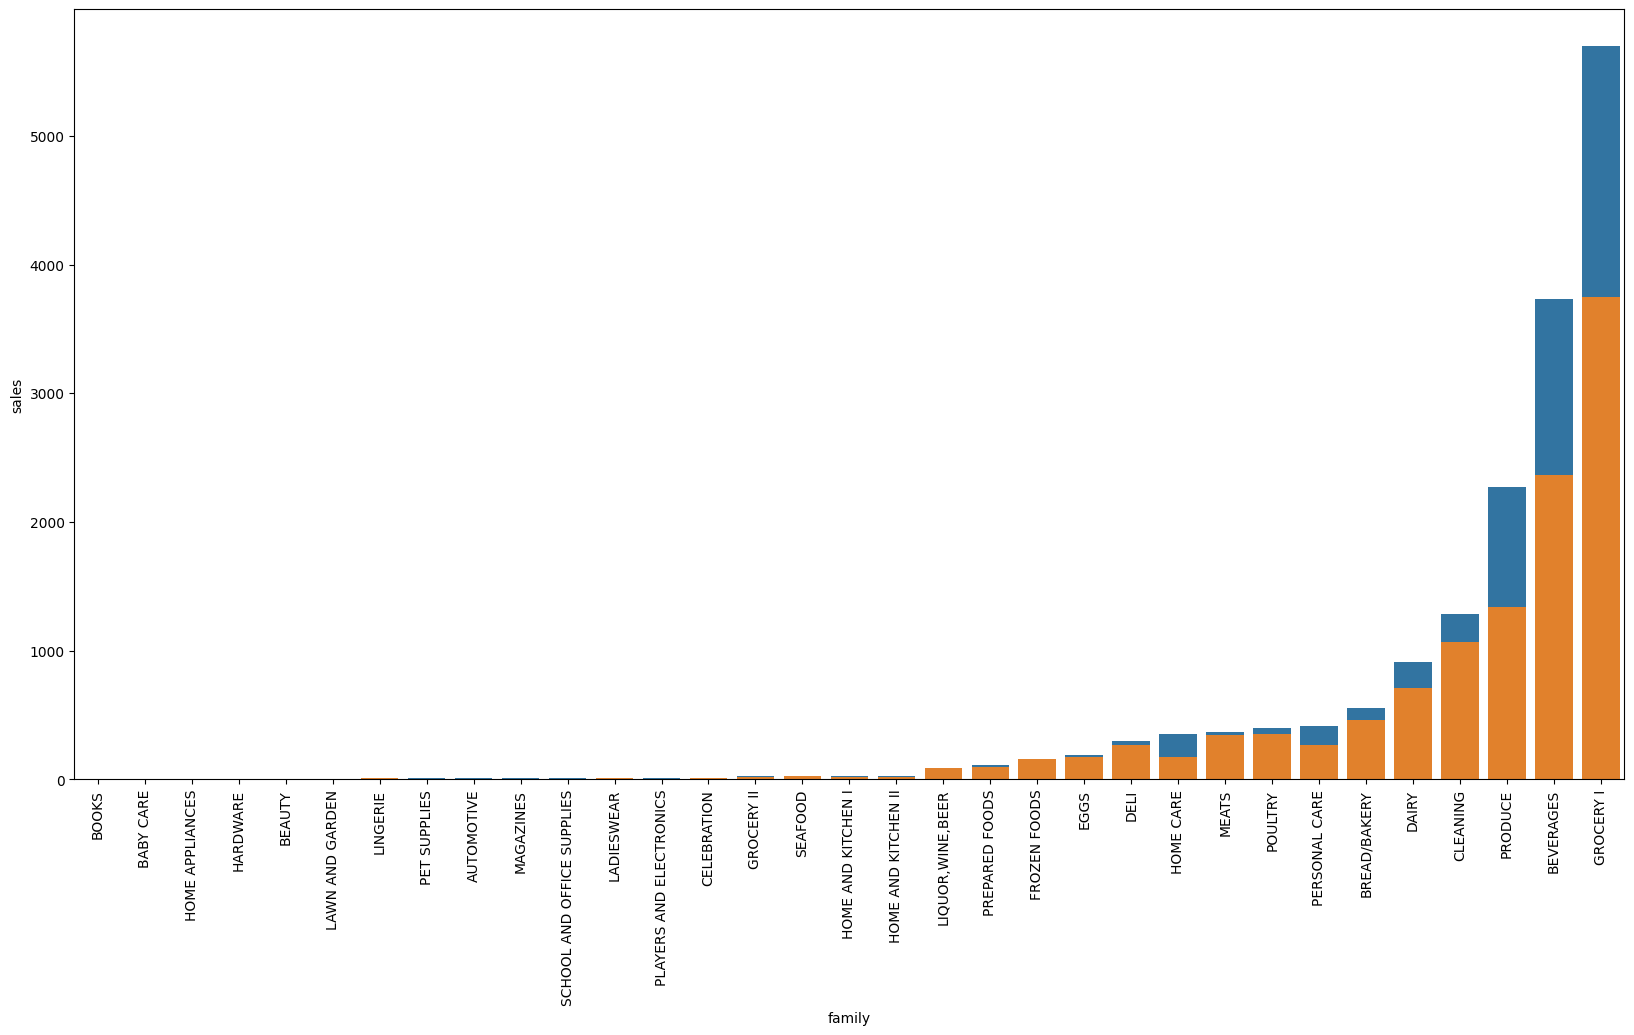

In [90]:
x = pd.date_range(start = '2016-04-16',end='2016-05-08')

y = train[train['date'].isin(x)].groupby(['family'])['sales'].mean().sort_values().to_frame()

plt.figure(figsize = (20, 10))


sns.barplot(data = y, x = 'family', y = 'sales')
plt.xticks(rotation = 90)


z = train[~train['date'].isin(x)].groupby(['family'])['sales'].mean().sort_values().to_frame()

sns.barplot(data = z, x = 'family', y = 'sales')
plt.xticks(rotation = 90)


#sns.boxplot(data = family, y = 'sales')

In [86]:
y

,sales
family,
BOOKS,0.000000e+00
BABY CARE,3.370000e+02
HOME APPLIANCES,6.420000e+02
HARDWARE,1.865000e+03
BEAUTY,6.438000e+03
LAWN AND GARDEN,7.016000e+03
LINGERIE,7.421000e+03
PET SUPPLIES,8.529000e+03
AUTOMOTIVE,8.664000e+03


<Axes: xlabel='onpromotion', ylabel='Count'>

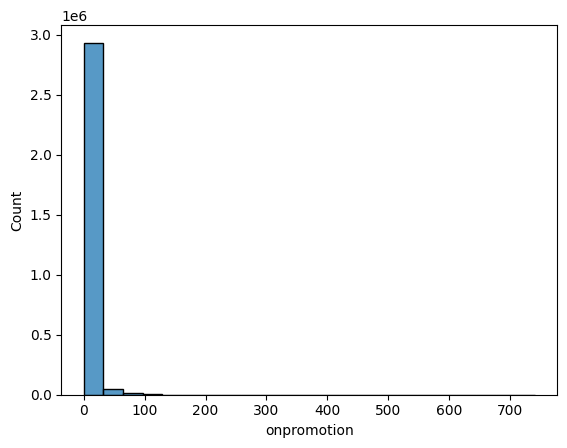

In [29]:
sns.histplot(data = train, x = 'onpromotion')

([<matplotlib.axis.XTick at 0x208b94f7ef0>,
 [Text(2013, 0, '2013'),
  Text(2014, 0, '2014'),
  Text(2015, 0, '2015'),
  Text(2016, 0, '2016'),
  Text(2017, 0, '2017')])

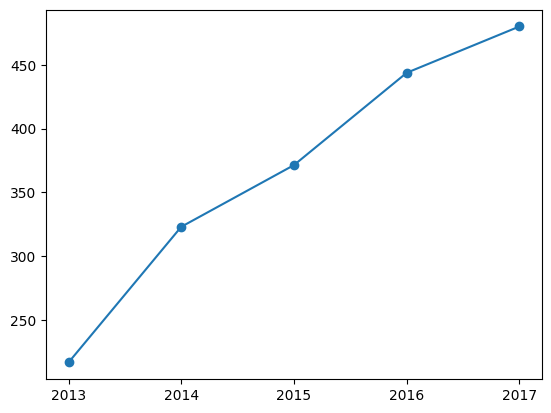

In [30]:
train['year'] = pd.DatetimeIndex(train['date']).year

yearly_data = train.groupby('year')['sales'].mean().reset_index()
plt.plot(yearly_data['year'], yearly_data['sales'], marker='o')

plt.xticks(range(2013, 2018))

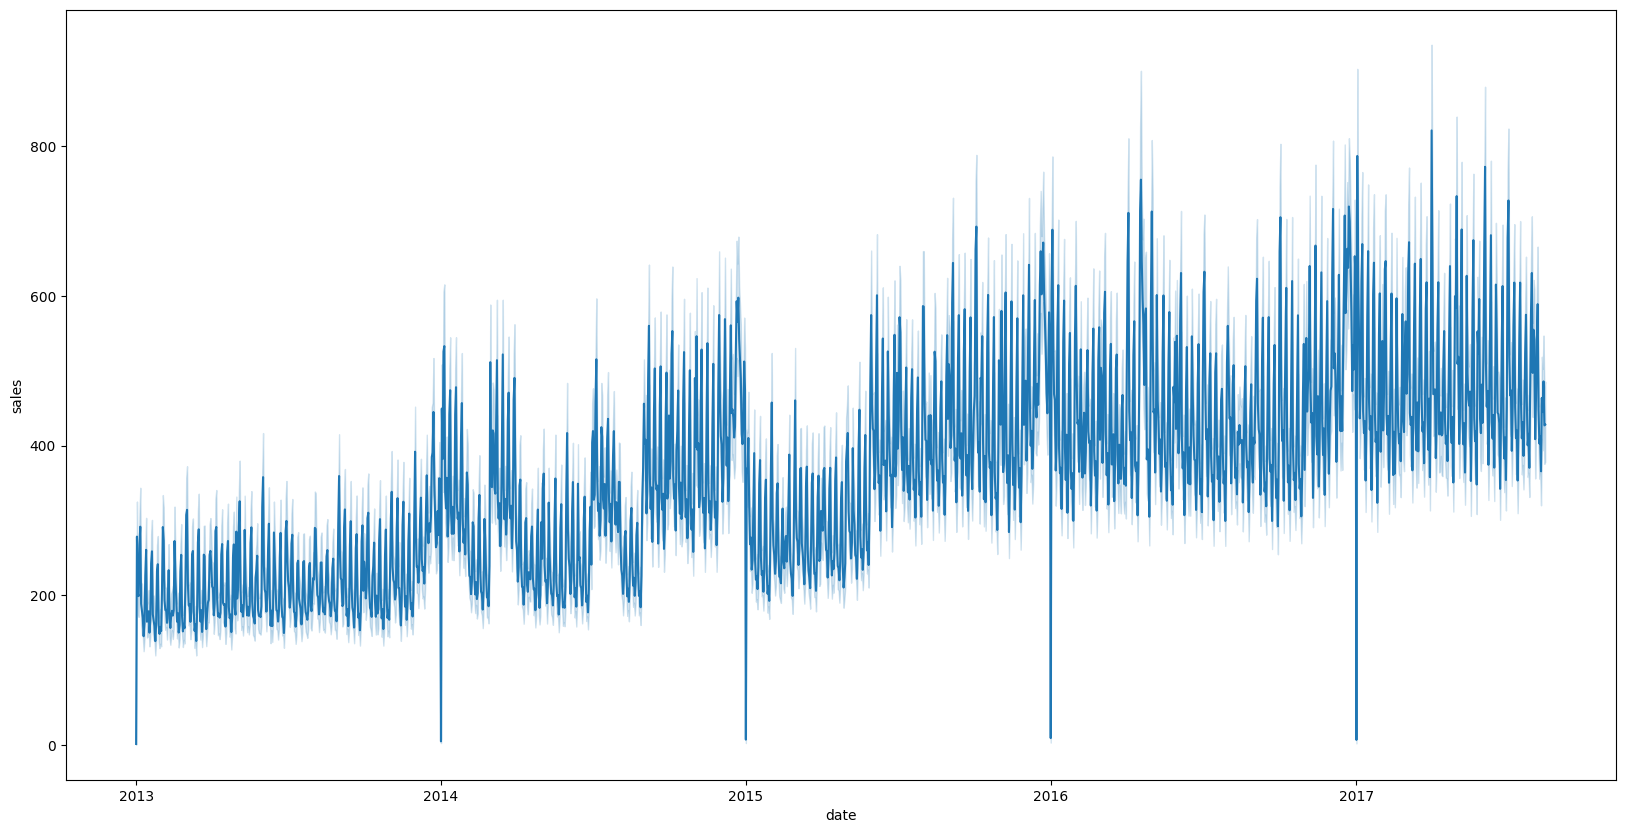

In [31]:
train['date'] = pd.to_datetime(train['date'])

plt.figure(figsize=(20, 10))
sns.lineplot(data = train, x = 'date', y = 'sales')

plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

In [32]:
train['month'] = pd.DatetimeIndex(train['date']).month
train

,id,date,store_nbr,family,sales,onpromotion,year,month
0,0,2013-01-01,1,AUTOMOTIVE,0.000,0,2013,1
1,1,2013-01-01,1,BABY CARE,0.000,0,2013,1
2,2,2013-01-01,1,BEAUTY,0.000,0,2013,1
3,3,2013-01-01,1,BEVERAGES,0.000,0,2013,1
4,4,2013-01-01,1,BOOKS,0.000,0,2013,1
...,...,...,...,...,...,...,...,...
3000883,3000883,2017-08-15,9,POULTRY,438.133,0,2017,8
3000884,3000884,2017-08-15,9,PREPARED FOODS,154.553,1,2017,8
3000885,3000885,2017-08-15,9,PRODUCE,2419.729,148,2017,8
3000886,3000886,2017-08-15,9,SCHOOL AND OFFICE SUPPLIES,121.000,8,2017,8


<Axes: xlabel='month', ylabel='sales'>

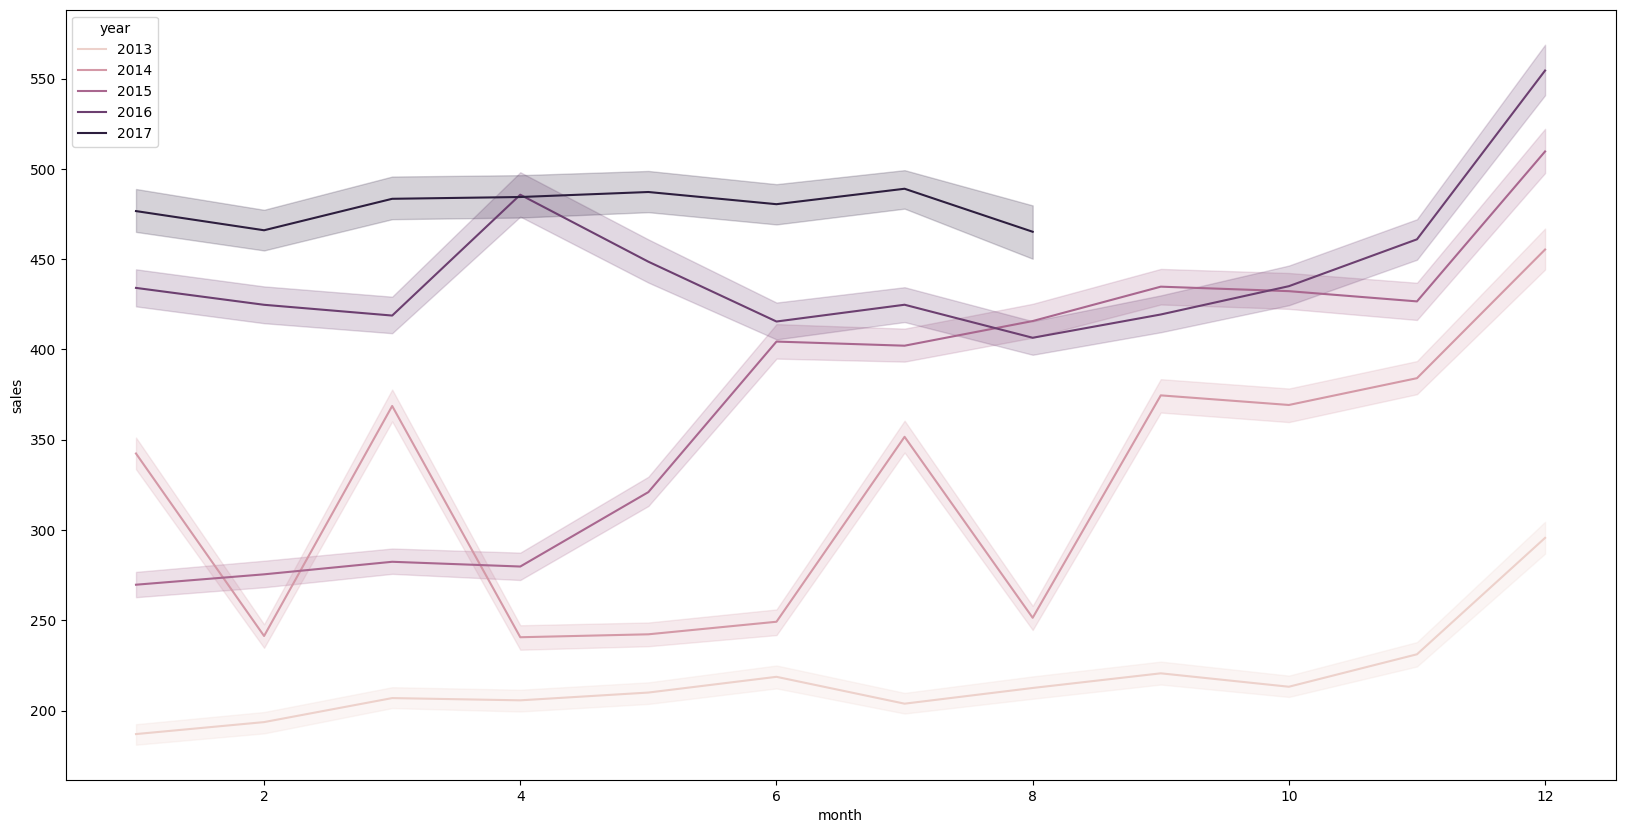

In [92]:
plt.figure(figsize=(20, 10))
sns.lineplot(data = train, x = 'month', y = 'sales', hue = 'year')

<Axes: xlabel='month', ylabel='sales'>

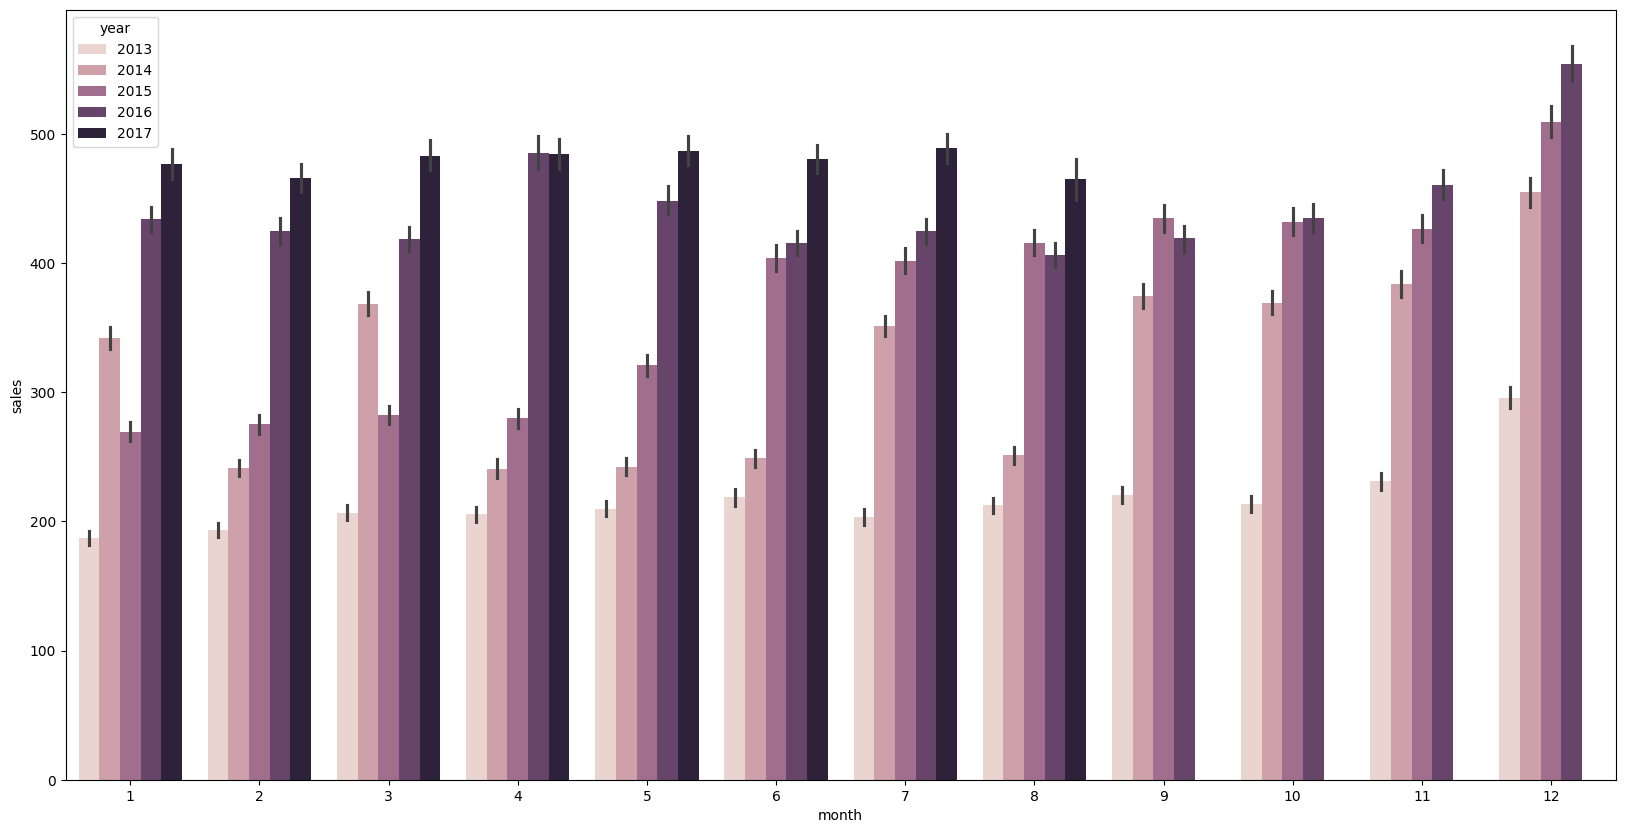

In [93]:
plt.figure(figsize=(20, 10))
sns.barplot(data = train, x = 'month', y = 'sales', hue = 'year')